In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 24.7 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, models , losses
from tensorflow.keras.regularizers import l1 , l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from tensorflow.keras import backend as K
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange , tqdm
import pathlib
from PIL import Image
import pickle 
from skimage import io
import cv2
import os

# Visualizing some data  

In [ ]:
img_path = './images'
data_dir = pathlib.Path(img_path)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))

print(image_count , " - Total SALICON datasets ( train , ground truth )")

20000  - Total SALICON datasets ( train , ground truth )


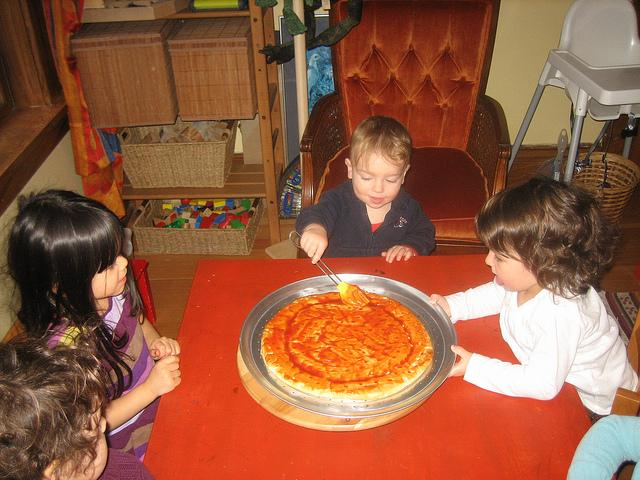

In [ ]:
r = np.random.randint(0,9999)
XTrain = np.asanyarray(list(sorted(data_dir.glob('train/*'),key=os.path.basename)))
Image.open(XTrain[r])
# print(XTrain[1034])

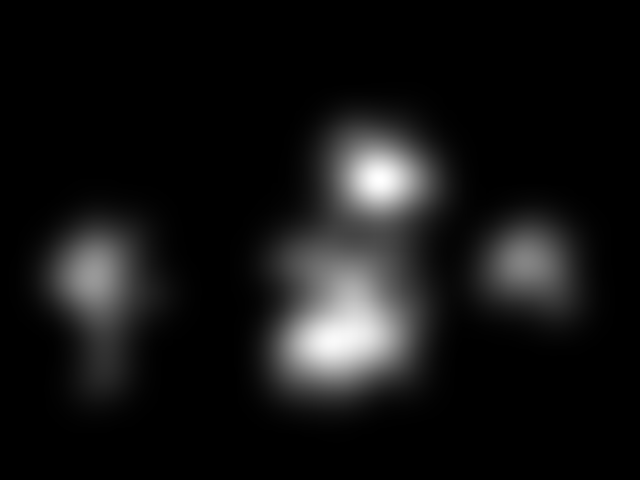

In [ ]:
YTrain = np.asanyarray(list(sorted(data_dir.glob('maps/train/*'),key=os.path.basename)))
Image.open(YTrain[r])
# print(YTrain[1034])

In [ ]:
YVal = np.asanyarray(list(sorted(data_dir.glob('maps/val/*'),key=os.path.basename)))
XVal = np.asanyarray(list(sorted(data_dir.glob('val/*'),key=os.path.basename)))

In [ ]:
XTest = np.asanyarray(list(sorted(data_dir.glob('test/*'),key=os.path.basename)))

# Preprocessing

In [ ]:
def preprocess_data(
    Data,
    Type,
    Dir,
    img_width,
    im_height,
    rotation,
    flip_vert,
    flip_hor,
    index
    ):
    st , end = index[0] , index[1]
    for i in range(len(Data)):
        st +=1
        image = Image.open(Data[i])

        new_img = image.resize((img_width, im_height))  # resize to ,(mg_width,im_height)

        new_img.save(Dir + Type + str(st) + '.jpg')

        if rotation[0] == True:
            data = img_to_array(new_img)
            samples = np.expand_dims(data, 0)
            data_generated = \
                ImageDataGenerator(rotation_range=rotation[1])
            it = data_generated.flow(samples, batch_size=1, seed=123)
            for j in range(5):
                batch = it.next()
                result = batch[0].astype('uint8')
                result = Image.fromarray(result)
                result.save(Dir + Type + str(j) + '_' + str(j) + '.jpg')

        if flip_vert == True:
            data_generated = ImageDataGenerator(rotation_range=90,
                    vertical_flip=True)
            it = data_generated.flow(samples, batch_size=1, seed=123)
            for j in range(5):
                batch = it.next()
                result = batch[0].astype('uint8')
                result = Image.fromarray(result)
                result.save(Dir + Type + str(j) + '__' + str(j) + '.jpg'
                            )

        if flip_hor == True:
            data_generated = ImageDataGenerator(rotation_range=90,
                    horizontal_flip=True)
            it = data_generated.flow(samples, batch_size=1, seed=123)
            for j in range(5):
                batch = it.next()
                result = batch[0].astype('uint8')
                result = Image.fromarray(result)
                result.save(Dir + Type + str(j) + '___' + str(j)
                            + '.jpg')

In [ ]:

# Already done

# preprocess_data(
#     XTrain,
#     'X',
#     'X_Train/',
#     img_width=96,
#     im_height=96,
#     rotation=(False, 0),
#     flip_vert=False,
#     flip_hor=False,
#     index = (0,10000)
#     )
# preprocess_data(
#     YTrain,
#     'Y',
#     'Y_Train/',
#     img_width=96,
#     im_height=96,
#     rotation=(False, 0),
#     flip_vert=False,
#     flip_hor=False,
#     index= (0,10000)
#     )
# preprocess_data(
#     XVal,
#     'X',
#     'X_Train/',
#     img_width=96,
#     im_height=96,
#     rotation=(False, 0),
#     flip_vert=False,
#     flip_hor=False,
#     index = (10001,15000)
#     )
# preprocess_data(
#     YVal,
#     'Y',
#     'Y_Train/',
#     img_width=96,
#     im_height=96,
#     rotation=(False, 0),
#     flip_vert=False,
#     flip_hor=False,
#     index = (10001,15000)
#     )

# Download data

In [ ]:

'''
X Data
https://drive.google.com/file/d/1vXE3lgcJEl8ksalFAOFvwopXMticPXnC/view?usp=sharing
id = '1vXE3lgcJEl8ksalFAOFvwopXMticPXnC'


Y Data
https://drive.google.com/file/d/1VfDBmypPDuOWBY3zujP06wOmk_lwaurG/view?usp=sharing
id = '1VfDBmypPDuOWBY3zujP06wOmk_lwaurG'

Paper
https://drive.google.com/file/d/1MYHNn1TwEtYBNsIRYEL0Kys3Jzd6kHQa/view?usp=sharing
id = 1MYHNn1TwEtYBNsIRYEL0Kys3Jzd6kHQa
'''

!gdown --id 1vXE3lgcJEl8ksalFAOFvwopXMticPXnC 

!gdown --id 1VfDBmypPDuOWBY3zujP06wOmk_lwaurG

!gdown --id 1MYHNn1TwEtYBNsIRYEL0Kys3Jzd6kHQa

os.mkdir(os.path.join('X_Train'))
os.mkdir(os.path.join('Y_Train'))

!7z x X_Train.7z X_Train/
!7z x Y_Train.7z Y_Train/

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vXE3lgcJEl8ksalFAOFvwopXMticPXnC
To: /content/X_Train.7z
100% 35.0M/35.0M [00:01<00:00, 27.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VfDBmypPDuOWBY3zujP06wOmk_lwaurG
To: /content/Y_Train.7z
100% 8.16M/8.16M [00:00<00:00, 17.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https

In [ ]:
def read_data(Dir  , grayscale):
    data = []
    path= os.path.join(Dir)
    for img in sorted(os.listdir(path)):
        if not grayscale :
            data.append(cv2.imread(os.path.join(path,img)))
        else :
            data.append(cv2.resize(cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE), (48, 48)))
    return np.asarray(data)

In [ ]:
images = read_data('X_Train' , grayscale = False)
maps = read_data('Y_Train' , grayscale = True)

In [ ]:
train_images = images[:12000]
test_images = images[12000:]
train_maps = maps[:12000]
test_maps = maps[12000:]

print("Train data : \n X \t" , train_images.shape ,"\n Y \t", train_maps.shape, "\nTest data :  \n X \t", test_images.shape,"\n Y \t", test_maps.shape)

Train data : 
 X 	 (12000, 96, 96, 3) 
 Y 	 (12000, 48, 48) 
Test data :  
 X 	 (3000, 96, 96, 3) 
 Y 	 (3000, 48, 48)


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


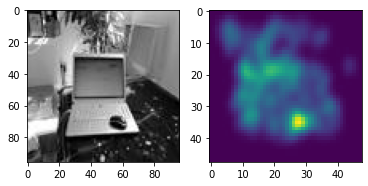

In [ ]:
idx = np.random.randint(0,10000)
plt.subplot(1, 2, 1)
plt.imshow(train_images[idx])
plt.subplot(1, 2, 2)
plt.imshow(train_maps[idx])
print(type(train_images),type(test_images),type(train_maps),type(test_maps))

In [ ]:
Salnet = models.Sequential()

In [ ]:
Salnet.add(layers.Conv2D(32, (5, 5), input_shape=(96, 96, 3),
          activation='relu'))
Salnet.add(layers.MaxPool2D((2, 2), strides=2))
Salnet.add(layers.Conv2D(64, (3, 3), activation='relu'))
Salnet.add(layers.MaxPool2D((3, 3), strides=2))
Salnet.add(layers.Conv2D(128, (3, 3), activation='relu'))
Salnet.add(layers.AveragePooling2D((3, 3), strides=2))
Salnet.add(layers.Flatten())  # flatten
Salnet.add(layers.Dense(48 * 48 * 2))

Salnet.add(tfa.layers.Maxout(48 * 48))

Salnet.add(layers.Dense(48 * 48, activation='linear'))
          

# activity_regularizer=tf.keras.regularizers.l1(0.01))
# kernel_regularizer=tf.keras.regularizers.l2(0.01)

In [ ]:
Salnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       73856     
                                                                 
 average_pooling2d (AverageP  (None, 9, 9, 128)        0

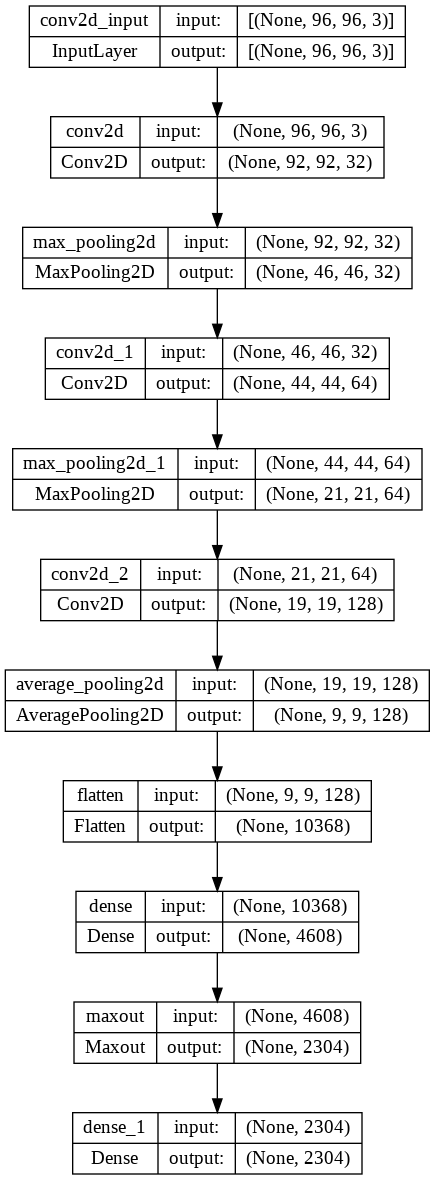

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(Salnet, to_file='Salnet.png', show_shapes=True, show_layer_names=True)


https://transfer.sh/K20aTu/Sal.h5

In [ ]:
BATCH_SIZE = 100
N_TRAIN = int(1e4)
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.03,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)




opt = tf.keras.optimizers.RMSprop(learning_rate=0.01,
    rho=0.9,
    momentum=0.2,
    epsilon=1e-07,
    centered=True)

model.compile(  # TODO,
    optimizer=opt,
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()], 
    # metrics=['mae', 'mse']
    )
K.set_value(model.optimizer.learning_rate, 0.001)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(
    steps_per_epoch = STEPS_PER_EPOCH,
    x=train_images,
    y=np.reshape(train_maps, (12000, 2304)),
    epochs=150,
    validation_split=0.2
    )


Epoch 1/150
100/100 [==============================] - 6s 55ms/step - loss: 22.9970 - root_mean_squared_error: 42.4998 - val_loss: 20.6673 - val_root_mean_squared_error: 38.9657
Epoch 2/150
100/100 [==============================] - 5s 54ms/step - loss: 20.6985 - root_mean_squared_error: 38.9127 - val_loss: 19.6907 - val_root_mean_squared_error: 36.0370
Epoch 3/150
100/100 [==============================] - 6s 56ms/step - loss: 19.8965 - root_mean_squared_error: 37.4821 - val_loss: 18.9785 - val_root_mean_squared_error: 37.2905
Epoch 4/150
100/100 [==============================] - 6s 56ms/step - loss: 19.3590 - root_mean_squared_error: 36.5085 - val_loss: 18.5615 - val_root_mean_squared_error: 34.8861
Epoch 5/150
100/100 [==============================] - 6s 56ms/step - loss: 18.9137 - root_mean_squared_error: 35.6470 - val_loss: 18.6285 - val_root_mean_squared_error: 36.3316
Epoch 6/150
100/100 [==============================] - 6s 57ms/step - loss: 18.6115 - root_mean_squared_error:

In [ ]:
pred = model.predict(test_images)

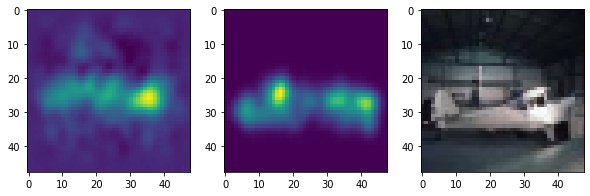

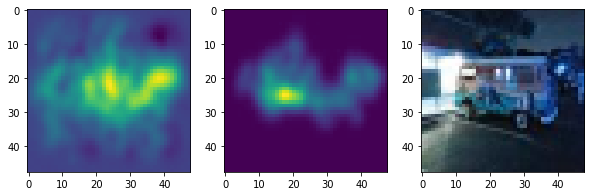

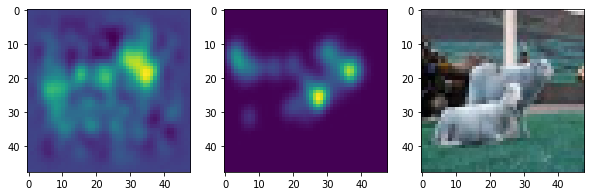

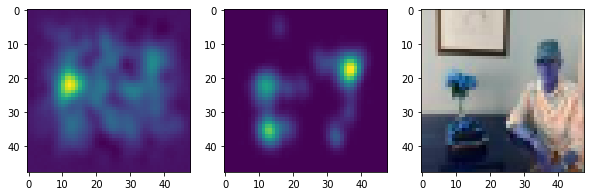

In [ ]:
for i in range(0,4):

  idx = np.random.randint(0,3000)
  plt.figure(figsize=(10,3))
  plt.subplot(1, 3, 1)
  plt.imshow(np.reshape(pred[idx, :], (48, 48)),interpolation='nearest')
  plt.subplot(1, 3, 2)
  plt.imshow(cv2.resize(test_maps[idx, :, :], (48, 48)),interpolation='nearest')
  plt.subplot(1, 3, 3)
  plt.imshow(cv2.resize(test_images[idx, :, :], (48, 48)))

In [ ]:
self_test = read_data('New' , grayscale = False)

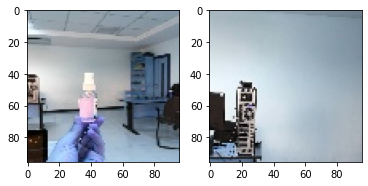

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(self_test[0])
plt.subplot(1, 2, 2)
plt.imshow(self_test[1])

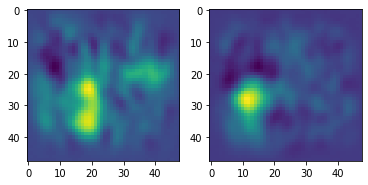

In [ ]:
new_pred = model.predict(self_test)

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(new_pred[0, :], (48, 48)),interpolation='nearest')
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(new_pred[1, :], (48, 48)),interpolation='nearest')
